# Cruelty Free Companies #

<img src=https://upload.wikimedia.org/wikipedia/commons/6/6f/Cruelty-Free-TN.jpg width=200 align="left"> 

###### This file is licensed under the Creative Commons Attribution-Share Alike 4.0 International license. ######

<br><br>I will be getting all lists used here from [Logical Harmony](https://logicalharmony.net/cruelty-free-brand-list/).

In [125]:
# import libraries
import requests
from bs4 import BeautifulSoup

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [130]:
r = requests.get("https://logicalharmony.net/cruelty-free-brand-list/")
soup = BeautifulSoup(r.text, 'html.parser')

# create an empty list that will store brands
brands = []

# create another list that will contain each list item still with the tags
rows = []

# get all list tags in entry-content part of the page (found by inspecting site)
brand_section1 = soup.find(class_='entry-content')
for brand in brand_section1.find_all('li'):
    # make sure brands are being extracted correctly
    # print(brand.text)
    # append each brand to the list of brands
    brands.append(brand.text)
    # keep the tags info in this list
    rows.append(brand)
    
len(brands)
    

898

In [131]:
# create dataframe - start with just brands list, then adjust
df = pd.DataFrame({'Brand_info': brands})
df.head()

,Brand_info
0,If a brand is completely vegan “100% Vegan” ne...
1,It is noted if a brand is cruelty-free but is ...
2,"If you see a brand in a font that isn’t black,..."
3,100% Pure
4,100BON – 100% vegan


In [132]:
# The first three will always be her directions, so drop those rows
df = df.iloc[3:].reset_index(drop=True)
df.head()

,Brand_info
0,100% Pure
1,100BON – 100% vegan
2,1121 Apothecary – 100% vegan
3,21 Drops – 100% vegan
4,2B


In [133]:
# create a new column that tells whether or not a product is vegan
df['All_vegan'] = df['Brand_info'].str.contains('100% vegan')
df['Partial_vegan'] = df['Brand_info'].str.contains('vegan product', case=False)

In [135]:
print(df.All_vegan.sum())
print(df.Partial_vegan.sum())
df.head()

362
3


,Brand_info,All_vegan,Partial_vegan
0,100% Pure,False,False
1,100BON – 100% vegan,True,False
2,1121 Apothecary – 100% vegan,True,False
3,21 Drops – 100% vegan,True,False
4,2B,False,False


In [136]:
df['Brand_info'].str.contains('parent company').sum()

53

In [137]:
# create a column that tells if a brand is owned by a company that is NOT cruelty free
df['Bad_parent_company'] = df['Brand_info'].str.contains('parent company', case=False)

In [138]:
df.head()

,Brand_info,All_vegan,Partial_vegan,Bad_parent_company
0,100% Pure,False,False,False
1,100BON – 100% vegan,True,False,False
2,1121 Apothecary – 100% vegan,True,False,False
3,21 Drops – 100% vegan,True,False,False
4,2B,False,False,False


In [139]:
df['Brand_info'].str.contains('Black-owned', case=False).sum()

51

In [140]:
# create a column that tells if the company is black-owned
df['Black_owned'] = df['Brand_info'].str.contains('Black-owned', case=False)
df.head()

,Brand_info,All_vegan,Partial_vegan,Bad_parent_company,Black_owned
0,100% Pure,False,False,False,False
1,100BON – 100% vegan,True,False,False,False
2,1121 Apothecary – 100% vegan,True,False,False,False
3,21 Drops – 100% vegan,True,False,False,False
4,2B,False,False,False,False


In [141]:
# start to simplify the company name by removing attributes already noted in new columns
brand_df = df.copy() 
brand_df['Brand_info'].str.contains('–')

0      False
1       True
2       True
3       True
4      False
       ...  
890    False
891    False
892    False
893    False
894     True
Name: Brand_info, Length: 895, dtype: bool

In [142]:
brand_df.rename(columns={'Brand_info':'Brand'}, inplace=True)
brand_df.head()

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned
0,100% Pure,False,False,False,False
1,100BON – 100% vegan,True,False,False,False
2,1121 Apothecary – 100% vegan,True,False,False,False
3,21 Drops – 100% vegan,True,False,False,False
4,2B,False,False,False,False


In [143]:
brand_df['Brand'] = brand_df['Brand'].str.split('–').str[0]
brand_df.head(10)

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned
0,100% Pure,False,False,False,False
1,100BON,True,False,False,False
2,1121 Apothecary,True,False,False,False
3,21 Drops,True,False,False,False
4,2B,False,False,False,False
5,2nd KIND,True,False,False,False
6,"7 Virtues, The",True,False,False,False
7,8 Greens,False,False,False,False
8,,False,False,False,False
9,A Girl’s Gotta Spa,True,False,False,False


In [144]:
import re
brand_df['Brand'].str.contains(re.escape('(')).sum()

18

In [145]:
brand_df[brand_df['Brand'].str.contains(re.escape('('))]

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned
84,"Balm, The (theBalm)",False,False,False,False
139,Bossy Cosmetics (Bossy Lipstick),False,False,False,True
241,Earth Friendly Products (ECOS),False,False,False,False
251,ELF (Eyes Lips Face/E.L.F.),True,False,False,False
262,EOS (Evolution of Smooth),False,False,False,False
352,Hero Cosmetics (also known as Mighty Patch),False,False,False,False
359,Hourglass (Hourglass Cosmetics vegan product l...,False,True,True,False
401,Jouer (Jouer Vegan Products List),False,True,False,False
441,KVD Beauty (formerly KVD Vegan Beauty and Kat ...,True,False,False,False
446,La Couleur Couture (LACC),True,False,False,False


In [146]:
brand_df[brand_df.Partial_vegan]

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned
359,Hourglass (Hourglass Cosmetics vegan product l...,False,True,True,False
401,Jouer (Jouer Vegan Products List),False,True,False,False
605,NYX Cosmetics (NYX Cosmetics Vegan Product List),False,True,True,False


In [147]:
partial_veg_brands = brand_df[brand_df.Partial_vegan]['Brand'].str.split(re.escape('(')).str[0]
partial_veg_brands

359        Hourglass 
401            Jouer 
605    NYX Cosmetics 
Name: Brand, dtype: object

In [148]:
brand_df.loc[brand_df.Partial_vegan, 'Brand'] = partial_veg_brands
brand_df[brand_df['Brand'].str.contains(re.escape('('))]

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned
84,"Balm, The (theBalm)",False,False,False,False
139,Bossy Cosmetics (Bossy Lipstick),False,False,False,True
241,Earth Friendly Products (ECOS),False,False,False,False
251,ELF (Eyes Lips Face/E.L.F.),True,False,False,False
262,EOS (Evolution of Smooth),False,False,False,False
352,Hero Cosmetics (also known as Mighty Patch),False,False,False,False
441,KVD Beauty (formerly KVD Vegan Beauty and Kat ...,True,False,False,False
446,La Couleur Couture (LACC),True,False,False,False
467,LH Cosmetics (Linda Hallberg Cosmetics),False,False,False,False
553,MOMMA (Ministry of Mineral Makeup Australia),True,False,False,False


In [149]:
brand_df[brand_df.Partial_vegan]

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned
359,Hourglass,False,True,True,False
401,Jouer,False,True,False,False
605,NYX Cosmetics,False,True,True,False


In [150]:
# drop any accidentally empty rows (from blank bullet points on website)
brand_df = brand_df[brand_df.Brand != '']
brand_df.head(12)

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned
0,100% Pure,False,False,False,False
1,100BON,True,False,False,False
2,1121 Apothecary,True,False,False,False
3,21 Drops,True,False,False,False
4,2B,False,False,False,False
5,2nd KIND,True,False,False,False
6,"7 Virtues, The",True,False,False,False
7,8 Greens,False,False,False,False
9,A Girl’s Gotta Spa,True,False,False,False
10,ABBA Pure Performance Hair Care,False,False,True,False


### How many have parent companies that are not cruelty free ###

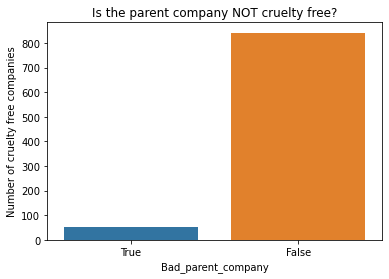

In [151]:
# import graphing packages
import matplotlib.pyplot as plt
import seaborn as sns

fig = sns.countplot(data=brand_df, x='Bad_parent_company', order=[True, False])
fig.set_title('Is the parent company NOT cruelty free?')
fig.set_ylabel('Number of cruelty free companies');

In [156]:
# now try with plotly
import plotly.express as px

fig = px.histogram(brand_df, x='Bad_parent_company', color="Black_owned", category_orders = {'Bad_parent_company':[True, False]}, title='Is the parent company NOT cruelty-free?')
fig.show();

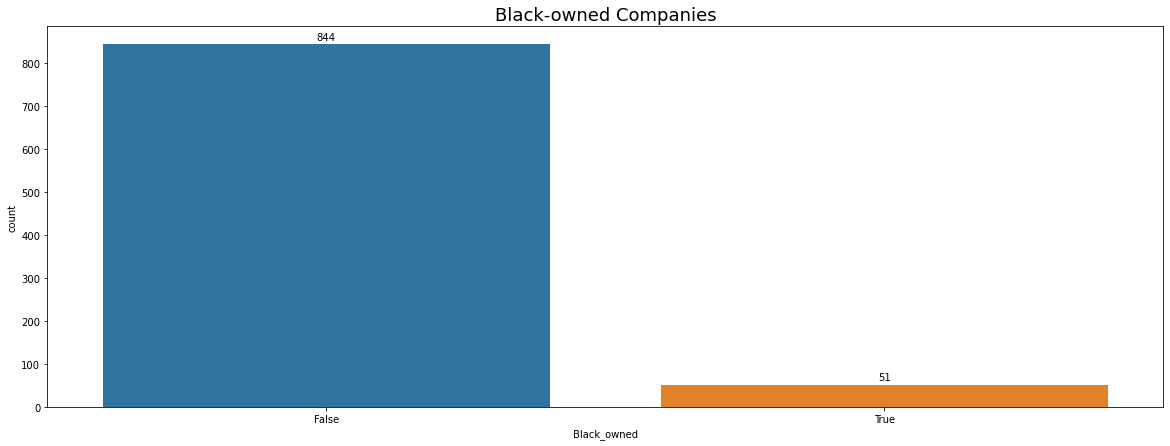

In [157]:
fig, ax1 = plt.subplots(figsize=(20,7))
graph = sns.countplot(ax=ax1,x='Black_owned', data=brand_df)
graph.set_title("Black-owned Companies", fontdict={'fontsize': 18})
# graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 10,
        df['Black_owned'].value_counts()[i],ha="center")
    i += 1

In [158]:
#fig = sns.countplot(data=brand_df, x='Black_owned', order=[True, False])
#fig.set_title('Is the company black-owned?')
#fig.set_ylabel('Black-owned companies');

In [159]:
# check out vegan brand values, along with which are black-owned
fig = px.histogram(brand_df, x='All_vegan', color="Black_owned", category_orders={'All_vegan': [True, False]}, title='Are these products 100% vegan?')
fig.show();

In [160]:
# are there any vegan brands owned by a company that is not cruelty free
brand_df[brand_df.All_vegan & brand_df.Bad_parent_company]

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned
165,Certain Dri,True,False,True,False
217,dermaGEEK,True,False,True,False
249,Ecover,True,False,True,False
345,Hello Products,True,False,True,False
427,KKW Fragrance,True,False,True,False
444,Kylie Skin,True,False,True,False
539,Method,True,False,True,False
625,"Ordinary, The",True,False,True,False
686,Pureology,True,False,True,False
728,Schmidt’s Naturals,True,False,True,False


There sure are!  Let's graph this in two different ways.

In [161]:
fig = px.histogram(brand_df, x='Bad_parent_company', color='All_vegan', category_orders={'Bad_parent_company': [True, False]}, title='Brands with Parent Companies that are NOT Cruelty Free')
fig.show();

In [162]:
fig = px.histogram(brand_df, x='All_vegan', color='Bad_parent_company', category_orders={'All_vegan': [True, False]}, title='Is the brand vegan?')
fig.show();

In [163]:
# create dataframes with just each attribute
bad_co = brand_df[brand_df.Bad_parent_company]
vegan = brand_df[brand_df.All_vegan]   # we won't analyze brands with just a vegan sub-list of products
black = brand_df[brand_df.Black_owned]

^^^ That will be for some future graphs after I clean the larger dataframe below.

In [164]:
veg_cf_black = brand_df[brand_df.All_vegan & brand_df.Black_owned & ~brand_df.Bad_parent_company]

## Companies that are vegan, black-owned, *and* do not have a parent company that isn't cruelty free ##

In [165]:
for brand in veg_cf_black['Brand']:
    print(brand)
    
print('\nThere are {} companies that are vegan, black-owned, and do not have a parent company that participates in animal testing.'.format(len(veg_cf_black)))

Afrocenchix 
Dehiya 
Dimension Nails 
Dirt Don’t Hurt Me 
Jane Carter Solution 
LYS Beauty 
Mented Cosmetics 
Mocha Whip 
Nash + Pino 
OOO Polish (Triple O Polish) 
Pear Nova 
People of Color Beauty 
Sabreen Cosmetics 
September Rose Co 
Shimirose 
SIMKHA 

There are 16 companies that are vegan, black-owned, and do not have a parent company that participates in animal testing.


## Black-owned companies ##

In [166]:
brand_df[brand_df.Black_owned]['Brand']

12                           Ace Beaute 
20                          Aeva Beauty 
21                          Afrocenchix 
41                          Anita Grant 
98                 BeautyStat Cosmetics 
99                       Beauty Bakerie 
103                     Beauty By Stony 
134                     Bold Brand, The 
139    Bossy Cosmetics (Bossy Lipstick) 
184            Coloured Raine Cosmetics 
211                              Dehiya 
224                     Dimension Nails 
225                  Dirt Don’t Hurt Me 
235                           DSMD Shop 
267                            Eu’Genia 
314                            Glamlite 
357                   Honey Pot Co, The 
386                Jane Carter Solution 
407                     Kalon Kosmetics 
424                    Kitaka of London 
428                   Klarity Kosmetics 
452                       Lamain Beauty 
453                        Lamik Beauty 
463                      Leilano Beauty 
479             

## "Cruelty free" products whose parent companies are *NOT* cruelty free! ##

In [167]:
brand_df[brand_df.Bad_parent_company]['Brand']

10     ABBA Pure Performance Hair Care 
70                               Aveda 
71                        Awake Beauty 
85                        bareMinerals 
106                              Becca 
144                            Briogeo 
150                        Burt’s Bees 
152                              Buxom 
159                            Caldrea 
165                        Certain Dri 
169               Chemistry Brand, The 
195                          COVERGIRL 
216            Dermablend Professional 
217                          dermaGEEK 
218                        Dermalogica 
221                           DevaCurl 
233                     Drunk Elephant 
249                             Ecover 
283                            Farmacy 
289                       Flesh Beauty 
307                            Garnier 
345                     Hello Products 
359                          Hourglass 
364                           Hylamide 
426                         KKW Beauty 


Next, I'll be looking for brands sold by different stores.

# Where to purchase #

## Ulta ##

In [170]:
ulta_url = 'https://logicalharmony.net/cruelty-free-brands-at-ulta/'

r = requests.get(ulta_url)
soup = BeautifulSoup(r.text, 'html.parser')

# create an empty list that will store brands
brands = []


# get all list tags in entry-content part of the page (found by inspecting site)
step1 = soup.find(class_='entry-content')

good_brands = step1.find('ul')

for brand in good_brands.find_all('li'):
    # make sure brands are being extracted correctly
    # print(brand.text)
    # append each brand to the list of brands
    brands.append(brand.text)
    
len(brands)

142

In [171]:
ulta_df = pd.DataFrame({'Brand_info': brands})
#ulta_df.shape

In [172]:
def add_booleans(df):
    # df will have one column called Brand_info
    # if it has 100% vegan after the name, it will be classified All_vegan
    # if it has a link to vegan products of the brand, it will be classified Partial_vegan
    
    # create a new column that tells whether or not a product is vegan
    df['All_vegan'] = df['Brand_info'].str.contains('100% vegan')
    df['Partial_vegan'] = df['Brand_info'].str.contains('vegan product', case=False)
    
    #print(df.head())
    
    # create a column that tells if a brand is owned by a company that is NOT cruelty free
    df['Bad_parent_company'] = df['Brand_info'].str.contains('parent company', case=False)
    
    # create a column that tells if the company is black-owned
    df['Black_owned'] = df['Brand_info'].str.contains('Black-owned', case=False)
    
    # drop any accidentally empty rows (from blank bullet points on website)
    df = df[df.Brand_info != '']
    
    return(df)
    
ulta_brand_df = add_booleans(ulta_df)  

ulta_brand_df.shape

(142, 5)

In [173]:
# re has been imported

def clean_up_brands(df):
    # this will be run on a dataframe with column Brand_info
    # simplify the company name by removing attributes already noted in new columns
    brand_df = df.copy() 
    
    brand_df.rename(columns={'Brand_info':'Brand'}, inplace=True)
    
    # most of the extra information comes after a "long" hyphen, which has been copied and pasted here
    brand_df['Brand'] = brand_df['Brand'].str.split('–').str[0]
    
    # if a brand has only some vegan items, that is designated in parentheses before the long hyphen
    # so we will get rid of that if necessary here
    partial_veg_brands = brand_df[brand_df.Partial_vegan]['Brand'].str.split(re.escape('(')).str[0]
    brand_df.loc[brand_df.Partial_vegan, 'Brand'] = partial_veg_brands
    
    return brand_df

In [174]:
ulta_brand_df = clean_up_brands(ulta_brand_df)
ulta_brand_df.head(12)

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned
0,Acure,True,False,False,False
1,AG Hair,False,False,False,False
2,Anastasia Beverly Hills,False,False,False,False
3,Andalou Naturals,False,False,False,False
4,Amopé,False,False,False,False
5,Aquis,False,False,False,False
6,Arctic Fox,True,False,False,False
7,Ardell,False,False,False,False
8,Art Naturals,False,False,False,False
9,Awake Beauty,False,False,True,False


In [175]:
# check to make sure parentheses are still there if they are part of the brand name
ulta_brand_df[ulta_brand_df['Brand'].str.contains(re.escape('('))]

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned


**Brand name matching between `brand_df` and the dataframes from the vendor pages is going to be a bit of a challenge.**
For example, ELF is listed as ELF (Eyes Lips Face/E.L.F.) in `brand_df` but as ELF Cosmetics in `ulta_brand_df`.

In [176]:
# add a column to indicate this item is sold at Ulta 
# once this is merged, if an item is not sold at Ulta, it will have a 0 in that column
ulta_brand_df['Ulta'] = 1
ulta_brand_df.head()

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta
0,Acure,True,False,False,False,1
1,AG Hair,False,False,False,False,1
2,Anastasia Beverly Hills,False,False,False,False,1
3,Andalou Naturals,False,False,False,False,1
4,Amopé,False,False,False,False,1


## Create dataframes for all other companies on *Logical Harmony* ##

## Sephora ##

In [177]:
sephora_url = 'https://logicalharmony.net/cruelty-free-brands-at-sephora/'

r = requests.get(sephora_url)
soup = BeautifulSoup(r.text, 'html.parser')

# create an empty list that will store brands
brands = []


# get all list tags in entry-content part of the page (found by inspecting site)
step1 = soup.find(class_='entry-content')

good_brands = step1.find('ul')

for brand in good_brands.find_all('li'):
    # make sure brands are being extracted correctly
    # print(brand.text)
    # append each brand to the list of brands
    brands.append(brand.text)
    
len(brands)

92

In [178]:
# make the Sephora dataframe
sephora_df = pd.DataFrame({'Brand_info': brands})

# add the columns then clean the brand names
sephora_brand_df = add_booleans(sephora_df) 
sephora_brand_df = clean_up_brands(sephora_brand_df)

# add column for merging later that indicates this brand is sold at Sephora
sephora_brand_df['Sephora'] = 1

sephora_brand_df.head(12)

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Sephora
0,"7 Virtues, The",True,False,False,False,1
1,8 Greens,False,False,False,False,1
2,Adwoa Beauty,False,False,False,False,1
3,Alpyn Beauty,False,False,False,False,1
4,Amika,False,False,False,False,1
5,Anastasia Beverly Hills,False,False,False,False,1
6,Antonym,False,False,False,False,1
7,Aquis,False,False,False,False,1
8,Athr Beauty (formerly Aether Beauty),True,False,False,False,1
9,Aveda 100% vegan,True,False,True,False,1


In [179]:
sephora_brand_df[sephora_brand_df.Brand.str.contains('vegan')]

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Sephora
9,Aveda 100% vegan,True,False,True,False,1


In [180]:
# hopefully this is the only "goof" - it was missed because there was no long hyphen
sephora_brand_df.iloc[9,0] = 'Aveda'

sephora_brand_df.head(12)

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Sephora
0,"7 Virtues, The",True,False,False,False,1
1,8 Greens,False,False,False,False,1
2,Adwoa Beauty,False,False,False,False,1
3,Alpyn Beauty,False,False,False,False,1
4,Amika,False,False,False,False,1
5,Anastasia Beverly Hills,False,False,False,False,1
6,Antonym,False,False,False,False,1
7,Aquis,False,False,False,False,1
8,Athr Beauty (formerly Aether Beauty),True,False,False,False,1
9,Aveda,True,False,True,False,1


## Beauty Bay ##

In [181]:
beauty_bay_url = 'https://logicalharmony.net/cruelty-free-brands-at-beauty-bay/'

r = requests.get(beauty_bay_url)
soup = BeautifulSoup(r.text, 'html.parser')

# create an empty list that will store brands
brands = []


# get all list tags in entry-content part of the page (found by inspecting site)
step1 = soup.find(class_='entry-content')

good_brands = step1.find('ul')

for brand in good_brands.find_all('li'):
    # make sure brands are being extracted correctly
    # print(brand.text)
    # append each brand to the list of brands
    brands.append(brand.text)
    
len(brands)

40

In [182]:
# make the Beauty Bay dataframe
bb_df = pd.DataFrame({'Brand_info': brands})

# add the columns then clean the brand names
bb_brand_df = add_booleans(bb_df) 
bb_brand_df = clean_up_brands(bb_brand_df)

# add column for merging later that indicates this brand is sold at Beauty Bay
bb_brand_df['Beauty_Bay'] = 1

bb_brand_df.head(12)

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Beauty_Bay
0,Anastasia Beverly Hills,False,False,False,False,1
1,Ardell,False,False,False,False,1
2,Bdellium Tools,False,False,False,False,1
3,beautyblender,False,False,False,False,1
4,"Beauty Chef, The",False,False,False,False,1
5,Blinc,False,False,False,False,1
6,Coloured Raine,False,True,False,False,1
7,Cover FX,True,False,False,False,1
8,Dose of Colors,False,False,False,False,1
9,Eye of Horus,False,False,False,False,1


## Cult Beauty ##

In [183]:
cult_beauty_url = 'https://logicalharmony.net/cruelty-free-brands-at-cult-beauty/'

r = requests.get(cult_beauty_url)
soup = BeautifulSoup(r.text, 'html.parser')

# create an empty list that will store brands
brands = []


# get all list tags in entry-content part of the page (found by inspecting site)
step1 = soup.find(class_='entry-content')

good_brands = step1.find('ul')

for brand in good_brands.find_all('li'):
    # make sure brands are being extracted correctly
    # print(brand.text)
    # append each brand to the list of brands
    brands.append(brand.text)
    
len(brands)

50

In [184]:
# make the Cult Beauty dataframe
cb_df = pd.DataFrame({'Brand_info': brands})

# add the columns then clean the brand names
cb_brand_df = add_booleans(cb_df) 
cb_brand_df = clean_up_brands(cb_brand_df)

# add column for merging later that indicates this brand is sold at Cult Beauty
cb_brand_df['Cult_Beauty'] = 1

cb_brand_df.head(12)

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Cult_Beauty
0,Anastasia Beverly Hills,False,False,False,False,1
1,"Beauty Chef, The",False,False,False,False,1
2,beautyblender,False,False,False,False,1
3,BECCA Cosmetics,False,True,True,False,1
4,Bio Ionic,False,False,False,False,1
5,Briogeo,False,False,True,False,1
6,COOLA Suncare,False,True,False,False,1
7,Charlotte Tilbury,False,True,False,False,1
8,Cover FX,True,False,False,False,1
9,Dr. Roebuck’s,False,False,False,False,1


## Nordstrom ##

In [185]:
nordstrom_url = 'https://logicalharmony.net/cruelty-free-brands-at-nordstrom/'

r = requests.get(nordstrom_url)
soup = BeautifulSoup(r.text, 'html.parser')

# create an empty list that will store brands
brands = []


# get all list tags in entry-content part of the page (found by inspecting site)
step1 = soup.find(class_='entry-content')

good_brands = step1.find('ul')

for brand in good_brands.find_all('li'):
    # make sure brands are being extracted correctly
    # print(brand.text)
    # append each brand to the list of brands
    brands.append(brand.text)
    
len(brands)

52

In [186]:
# make the Nordstrom dataframe
nordstrom_df = pd.DataFrame({'Brand_info': brands})

# add the columns then clean the brand names
nordstrom_brand_df = add_booleans(nordstrom_df) 
nordstrom_brand_df = clean_up_brands(nordstrom_brand_df)

# add column for merging later that indicates this brand is sold at Nordstrom
nordstrom_brand_df['Nordstrom'] = 1

nordstrom_brand_df.tail(12)

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Nordstrom
40,RMS Beauty,False,False,False,False,1
41,Sigma Beauty,False,False,False,False,1
42,Smashbox,False,True,True,False,1
43,Stila,False,False,False,False,1
44,StriVectin,False,False,False,False,1
45,Sunday Riley,False,False,False,False,1
46,Supergoop!,False,False,False,False,1
47,T3,False,False,False,False,1
48,Tata Harper,False,True,False,False,1
49,Too Faced,False,True,True,False,1


## Initial Merge ##

This will not account for names being similar but not identical, or even cases, but it will be a good start.

In [187]:
# to merge all dataframes on Brand (on the occasion they are named the same)
dfs = [brand_df, ulta_brand_df, sephora_brand_df, bb_brand_df, cb_brand_df, nordstrom_brand_df]

# merge them all
import functools as ft
merge1 = ft.reduce(lambda left, right: pd.merge(left, right, on='Brand'), dfs)

merge1.head()

/var/folders/pw/9j0pzyrs615dkcjzj755q6nr0000gn/T/ipykernel_60507/384661614.py:6: FutureWarning:

Passing 'suffixes' which cause duplicate columns {'Black_owned_x', 'Bad_parent_company_x', 'Partial_vegan_x', 'All_vegan_x'} in the result is deprecated and will raise a MergeError in a future version.



,Brand,All_vegan_x,Partial_vegan_x,Bad_parent_company_x,Black_owned_x,All_vegan_y,Partial_vegan_y,Bad_parent_company_y,Black_owned_y,Ulta,...,All_vegan_x,Partial_vegan_x,Bad_parent_company_x,Black_owned_x,Cult_Beauty,All_vegan_y,Partial_vegan_y,Bad_parent_company_y,Black_owned_y,Nordstrom
0,Anastasia Beverly Hills,False,False,False,False,False,False,False,False,1,...,False,False,False,False,1,False,False,False,False,1
1,Stila,False,False,False,False,False,False,False,False,1,...,False,False,False,False,1,False,False,False,False,1


Not exactly what I intended, but super cool to see the two brands that are in all dataframes.

In [188]:
merge2 = ft.reduce(lambda left, right: pd.merge_ordered(left, right, on=['Brand', 'All_vegan', 'Partial_vegan', 'Bad_parent_company', 'Black_owned']), dfs)

merge2.head()

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
0,100% Pure,False,False,False,False,NaN,NaN,NaN,NaN,NaN
1,100BON,True,False,False,False,NaN,NaN,NaN,NaN,NaN
2,1121 Apothecary,True,False,False,False,NaN,NaN,NaN,NaN,NaN
3,21 Drops,True,False,False,False,NaN,NaN,NaN,NaN,NaN
4,2B,False,False,False,False,NaN,NaN,NaN,NaN,NaN


In [189]:
merge2.shape

(1014, 10)

In [297]:
merge2.iloc[995:1003]

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
995,Zurvita,False,False,False,False,NaN,NaN,NaN,NaN,NaN
996,Zyderma HS,True,False,False,False,NaN,NaN,NaN,NaN,NaN
997,artnaturals,False,False,False,False,NaN,NaN,NaN,NaN,NaN
998,bare Minerals,False,False,True,False,NaN,NaN,NaN,NaN,1.0
999,bare Minerals,False,True,True,False,NaN,1.0,NaN,NaN,NaN
1000,bare Minerals,False,True,True,False,1.0,NaN,NaN,NaN,NaN
1001,bareMinerals,False,False,True,False,NaN,NaN,NaN,NaN,NaN
1002,beautyblender,False,False,False,False,1.0,1.0,1.0,1.0,1.0


In [298]:
merge3 = merge2.copy()
merge3.head()

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
0,100% Pure,False,False,False,False,NaN,NaN,NaN,NaN,NaN
1,100BON,True,False,False,False,NaN,NaN,NaN,NaN,NaN
2,1121 Apothecary,True,False,False,False,NaN,NaN,NaN,NaN,NaN
3,21 Drops,True,False,False,False,NaN,NaN,NaN,NaN,NaN
4,2B,False,False,False,False,NaN,NaN,NaN,NaN,NaN


In [299]:
merge3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1014 entries, 0 to 1013
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               1014 non-null   object 
 1   All_vegan           1014 non-null   bool   
 2   Partial_vegan       1014 non-null   bool   
 3   Bad_parent_company  1014 non-null   bool   
 4   Black_owned         1014 non-null   bool   
 5   Ulta                142 non-null    float64
 6   Sephora             92 non-null     float64
 7   Beauty_Bay          40 non-null     float64
 8   Cult_Beauty         50 non-null     float64
 9   Nordstrom           52 non-null     float64
dtypes: bool(4), float64(5), object(1)
memory usage: 59.4+ KB


In [300]:
# if a product is sold at a store, it is a 1.0
# if it is not, change it to a 0.0
# then change all to integer type
merge3.fillna(0, inplace=True)
float_cols = [col for col in merge3.columns if merge3[col].dtype=='float64']
merge3[float_cols] = merge3[float_cols].apply(lambda x: x.astype('int'))
merge3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1014 entries, 0 to 1013
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Brand               1014 non-null   object
 1   All_vegan           1014 non-null   bool  
 2   Partial_vegan       1014 non-null   bool  
 3   Bad_parent_company  1014 non-null   bool  
 4   Black_owned         1014 non-null   bool  
 5   Ulta                1014 non-null   int64 
 6   Sephora             1014 non-null   int64 
 7   Beauty_Bay          1014 non-null   int64 
 8   Cult_Beauty         1014 non-null   int64 
 9   Nordstrom           1014 non-null   int64 
dtypes: bool(4), int64(5), object(1)
memory usage: 59.4+ KB


In [301]:
merge3.iloc[390:395, :]

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
390,Honeybee Gardens,False,False,False,False,0,0,0,0,0
391,Hot Tresses,True,False,False,False,0,0,0,0,0
392,Hourglass Cosmetics,False,False,True,False,1,0,0,0,0
393,Hourglass Cosmetics,False,True,True,False,0,0,0,1,1
394,Hourglass Cosmetics,False,True,True,False,0,1,0,0,0


## Data cleaning ##

### Find duplicate brands and use the website to figure out the discrepancies. ###

In [302]:
merge3.Brand.value_counts()

Sol de Janeiro                  3
Ordinary, The                   2
Kylie Skin                      2
Urban Decay                     2
KKW Fragrance                   2
                               ..
GLAMCORp                        1
GLOSS Moderne                   1
GOSH Cosmetics                  1
GXVE Beauty                     1
washbeautyco. by MaskerAide     1
Name: Brand, Length: 1001, dtype: int64

In [303]:
# first remove leading and trailing spaces
merge3['Brand'] = merge3['Brand'].str.strip()
merge3.Brand.value_counts()

Hourglass Cosmetics            3
Pureology                      3
Urban Decay                    3
Ordinary, The                  3
Aveda                          3
                              ..
Glamlite                       1
Glow Recipe                    1
Glowoasis                      1
Gnarly Whale, The              1
washbeautyco. by MaskerAide    1
Name: Brand, Length: 960, dtype: int64

I'll use fuzzy wuzzy later, but for now I'll take care of the exact matches.

In [304]:
dup_df = merge3.groupby('Brand').filter(lambda g: g.Brand.size > 1)
# using this line below to help
# df.groupby("column3").filter(lambda g: (g.name != 0) and (g.column3.size >= 3))
dup_df

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
74,Aveda,True,False,True,False,0,1,0,0,0
75,Aveda,False,False,True,False,0,0,0,0,1
76,Aveda,False,False,True,False,0,0,0,0,0
77,Awake Beauty,False,False,True,False,1,0,0,0,0
78,Awake Beauty,False,False,True,False,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
942,Urban Decay,False,True,True,False,0,0,0,1,0
943,Urban Decay,False,True,True,False,0,1,0,0,1
998,bare Minerals,False,False,True,False,0,0,0,0,1
999,bare Minerals,False,True,True,False,0,1,0,0,0


In [305]:
# the 2021 Ulta update has Axiology as all vegan
# keep 80 and drop 79
# merge3.iloc[80,9] = 1
# merge3.drop(79, inplace=True)
# dup_df.drop([79,80], inplace=True)
# display(merge3.iloc[78:81])
# dup_df

Any booleans that I change will be from using the most recent update from the website.  I will also be combining the stores, then dropping the unnecessary row(s).

I will be starting at the bottom to avoid `.iloc` errors this caused me the first time through.

In [306]:
# bare minerals now has some vegan products
merge3.iloc[999:1002]

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
999,bare Minerals,False,True,True,False,0,1,0,0,0
1000,bare Minerals,False,True,True,False,1,0,0,0,0
1001,bareMinerals,False,False,True,False,0,0,0,0,0


In [307]:
# Okay, so the dup_df is helpful, but has still missed some entries, so I'll just use it as an initial guide
merge3.iloc[995:1005]

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
995,Zurvita,False,False,False,False,0,0,0,0,0
996,Zyderma HS,True,False,False,False,0,0,0,0,0
997,artnaturals,False,False,False,False,0,0,0,0,0
998,bare Minerals,False,False,True,False,0,0,0,0,1
999,bare Minerals,False,True,True,False,0,1,0,0,0
1000,bare Minerals,False,True,True,False,1,0,0,0,0
1001,bareMinerals,False,False,True,False,0,0,0,0,0
1002,beautyblender,False,False,False,False,1,1,1,1,1
1003,bkr,False,False,False,False,0,1,0,0,0
1004,butter LONDON,False,False,False,False,0,0,0,0,1


In [310]:
# bare Minerals now has a vegan product list
merge3.iloc[999,[5,9]]=1
merge3.iloc[999]

Brand                 bare Minerals
All_vegan                     False
Partial_vegan                  True
Bad_parent_company             True
Black_owned                   False
Ulta                              1
Sephora                           1
Beauty_Bay                        0
Cult_Beauty                       0
Nordstrom                         1
Name: 999, dtype: object

In [311]:
merge3.drop([998,1000,1001], inplace=True)
merge3.iloc[997:1003]

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
997,artnaturals,False,False,False,False,0,0,0,0,0
999,bare Minerals,False,True,True,False,1,1,0,0,1
1002,beautyblender,False,False,False,False,1,1,1,1,1
1003,bkr,False,False,False,False,0,1,0,0,0
1004,butter LONDON,False,False,False,False,0,0,0,0,1
1005,cocokind,False,False,False,False,0,0,0,0,0


In [318]:
merge3 = merge3.reset_index(drop=True)
merge3.iloc[997:1003]

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
997,artnaturals,False,False,False,False,0,0,0,0,0
998,bare Minerals,False,True,True,False,1,1,0,0,1
999,beautyblender,False,False,False,False,1,1,1,1,1
1000,bkr,False,False,False,False,0,1,0,0,0
1001,butter LONDON,False,False,False,False,0,0,0,0,1
1002,cocokind,False,False,False,False,0,0,0,0,0


In [322]:
dup_df.drop([998,999,1000], inplace=True)
dup_df.tail()

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
939,Uoma Beauty,False,False,False,False,1,0,0,1,0
940,Uoma Beauty,False,False,False,True,0,0,0,0,0
941,Urban Decay,False,False,True,False,1,0,0,0,0
942,Urban Decay,False,True,True,False,0,0,0,1,0
943,Urban Decay,False,True,True,False,0,1,0,0,1


In [325]:
merge3.iloc[943, [5,8]] = 1

In [327]:
merge3.drop([941,942], inplace=True)
merge3.reset_index(drop=True)
merge3.iloc[940:943]

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
940,Uoma Beauty,False,False,False,True,0,0,0,0,0
943,Urban Decay,False,True,True,False,1,1,0,1,1
944,Urban Veda,True,False,False,False,1,0,0,0,0


In [328]:
dup_df.drop([941,942,943], inplace=True)
dup_df.tail()

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
915,Too Faced,False,True,True,False,1,1,0,0,1
934,Uma Oils,False,False,False,False,0,0,0,0,0
935,Uma Oils,True,False,False,False,0,0,0,1,0
939,Uoma Beauty,False,False,False,False,1,0,0,1,0
940,Uoma Beauty,False,False,False,True,0,0,0,0,0


In [330]:
merge3.iloc[935:943]

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
935,Uma Oils,True,False,False,False,0,0,0,1,0
936,Unfiltered By Raw Sugar,False,False,False,False,0,0,0,0,0
937,Unsun Cosmetics,False,False,False,True,0,0,0,0,0
938,Uoga Uoga,False,False,False,False,0,0,0,0,0
939,Uoma Beauty,False,False,False,False,1,0,0,1,0
940,Uoma Beauty,False,False,False,True,0,0,0,0,0
943,Urban Decay,False,True,True,False,1,1,0,1,1
944,Urban Veda,True,False,False,False,1,0,0,0,0


In [331]:
# this is black-owned, created by a Nigerian-born woman
merge3.iloc[939,4] = True
merge3.iloc[935:943]

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
935,Uma Oils,True,False,False,False,0,0,0,1,0
936,Unfiltered By Raw Sugar,False,False,False,False,0,0,0,0,0
937,Unsun Cosmetics,False,False,False,True,0,0,0,0,0
938,Uoga Uoga,False,False,False,False,0,0,0,0,0
939,Uoma Beauty,False,False,False,True,1,0,0,1,0
940,Uoma Beauty,False,False,False,True,0,0,0,0,0
943,Urban Decay,False,True,True,False,1,1,0,1,1
944,Urban Veda,True,False,False,False,1,0,0,0,0


In [334]:
merge3.drop(940, inplace=True)

In [335]:
dup_df.drop([939,940], inplace=True)
dup_df.tail()

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
913,Too Faced,False,True,True,False,0,0,0,1,0
914,Too Faced,False,False,True,False,0,0,0,0,0
915,Too Faced,False,True,True,False,1,1,0,0,1
934,Uma Oils,False,False,False,False,0,0,0,0,0
935,Uma Oils,True,False,False,False,0,0,0,1,0


In [337]:
# on 2020 Cult Beauty page, this is listed as all vegan
merge3.drop(934, inplace=True)
dup_df.drop([934,935], inplace=True)
dup_df.tail()

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
899,Tatcha,False,False,True,False,0,0,0,0,0
900,Tatcha,False,False,True,False,0,1,0,0,0
913,Too Faced,False,True,True,False,0,0,0,1,0
914,Too Faced,False,False,True,False,0,0,0,0,0
915,Too Faced,False,True,True,False,1,1,0,0,1


In [340]:
# this does have a vegan product line
merge3.iloc[915,8] = 1
merge3.drop([913,914], inplace=True)
dup_df.drop([913,914,915], inplace=True)
dup_df.tail()

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
896,Tarte,False,False,True,False,0,0,0,0,0
897,Tata Harper,False,False,False,False,0,0,0,0,0
898,Tata Harper,False,True,False,False,0,1,0,1,1
899,Tatcha,False,False,True,False,0,0,0,0,0
900,Tatcha,False,False,True,False,0,1,0,0,0


In [341]:
merge3.drop(899, inplace=True)
dup_df.drop([899,900], inplace=True)
dup_df.tail()

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
861,Sol de Janeiro,False,True,True,False,0,1,0,0,0
895,Tarte,False,True,True,False,1,1,0,0,0
896,Tarte,False,False,True,False,0,0,0,0,0
897,Tata Harper,False,False,False,False,0,0,0,0,0
898,Tata Harper,False,True,False,False,0,1,0,1,1


In [342]:
# this does have a vegan product line
merge3.drop(897, inplace=True)
dup_df.drop([897,898], inplace=True)
dup_df.tail()

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
859,Sol de Janeiro,False,False,True,False,0,0,0,0,0
860,Sol de Janeiro,False,True,False,False,0,0,0,1,0
861,Sol de Janeiro,False,True,True,False,0,1,0,0,0
895,Tarte,False,True,True,False,1,1,0,0,0
896,Tarte,False,False,True,False,0,0,0,0,0


In [345]:
# they do have a vegan line
merge3.drop(896, inplace=True)
dup_df.drop([895,896], inplace=True)
dup_df.tail()

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
850,Smashbox,False,True,True,False,1,1,0,0,0
851,Smashbox,False,True,True,False,0,0,0,0,1
859,Sol de Janeiro,False,False,True,False,0,0,0,0,0
860,Sol de Janeiro,False,True,False,False,0,0,0,1,0
861,Sol de Janeiro,False,True,True,False,0,1,0,0,0


In [348]:
# from Logical Harmony (googled):
# 23 Nov 2021 — It's just been announced that 
# the cruelty-free brand Sold de Janeiro has been acquired by L'Occitane. L'Occitane is not a cruelty-free brand.
merge3.iloc[861,8]=1
merge3.iloc[861]

Brand                 Sol de Janeiro
All_vegan                      False
Partial_vegan                   True
Bad_parent_company              True
Black_owned                    False
Ulta                               0
Sephora                            1
Beauty_Bay                         0
Cult_Beauty                        1
Nordstrom                          0
Name: 861, dtype: object

In [349]:
merge3.drop([859,860], inplace=True)
dup_df.drop([859,860,861], inplace=True)
dup_df.tail()

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
818,Seed Phytonutrients,False,False,True,False,1,0,0,0,0
819,Seed Phytonutrients,False,False,True,False,0,0,0,0,0
849,Smashbox,False,False,True,False,0,0,0,0,0
850,Smashbox,False,True,True,False,1,1,0,0,0
851,Smashbox,False,True,True,False,0,0,0,0,1


In [353]:
# this does have a vegan product line
merge3.iloc[850,9]=1
merge3.drop([849,851], inplace=True)
dup_df.drop([849,850,851], inplace=True)
dup_df.tail()

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
758,Pureology,False,False,True,False,0,1,0,1,0
759,Pureology,True,False,True,False,0,0,0,0,0
760,Pureology,False,False,True,False,1,0,0,0,0
818,Seed Phytonutrients,False,False,True,False,1,0,0,0,0
819,Seed Phytonutrients,False,False,True,False,0,0,0,0,0


In [355]:
merge3.drop(819, inplace=True)
dup_df.drop([818,819], inplace=True)
dup_df.tail()

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
736,Pixi,False,False,False,False,0,0,0,0,0
737,Pixi,False,True,False,False,0,0,0,1,0
758,Pureology,False,False,True,False,0,1,0,1,0
759,Pureology,True,False,True,False,0,0,0,0,0
760,Pureology,False,False,True,False,1,0,0,0,0


In [358]:
# several sources report this as now 100% vegan
merge3.iloc[758, 5] = 1
merge3.iloc[758]

Brand                 Pureology
All_vegan                  True
Partial_vegan             False
Bad_parent_company         True
Black_owned               False
Ulta                          1
Sephora                       1
Beauty_Bay                    0
Cult_Beauty                   1
Nordstrom                     0
Name: 758, dtype: object

In [359]:
merge3.drop([759,760], inplace=True)
dup_df.drop([758,759,760], inplace=True)
dup_df.tail()

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
705,PUR Cosmetics,False,True,False,False,1,0,1,0,0
713,Patchology,False,False,False,False,0,0,0,1,0
714,Patchology,False,True,False,False,1,0,0,0,0
736,Pixi,False,False,False,False,0,0,0,0,0
737,Pixi,False,True,False,False,0,0,0,1,0


In [361]:
merge3.drop(736, inplace=True)
dup_df.drop([736, 737], inplace=True)
dup_df.tail()

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
693,"Ordinary, The",True,False,True,False,0,1,0,0,0
704,PUR Cosmetics,False,False,False,False,0,0,0,0,0
705,PUR Cosmetics,False,True,False,False,1,0,1,0,0
713,Patchology,False,False,False,False,0,0,0,1,0
714,Patchology,False,True,False,False,1,0,0,0,0


In [362]:
# these do have some vegan products
merge3.iloc[714, 8] = 1
merge3.iloc[714]

Brand                 Patchology
All_vegan                  False
Partial_vegan               True
Bad_parent_company         False
Black_owned                False
Ulta                           1
Sephora                        0
Beauty_Bay                     0
Cult_Beauty                    1
Nordstrom                      0
Name: 714, dtype: object

In [363]:
merge3.drop([704, 713], inplace=True)
dup_df.drop([704,705,713,714], inplace=True)
dup_df.tail()

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
682,OUAI,False,False,False,False,1,0,0,0,0
683,OUAI,False,False,True,False,0,1,0,0,0
691,"Ordinary, The",False,False,False,False,0,0,1,1,0
692,"Ordinary, The",True,False,False,False,1,0,0,0,0
693,"Ordinary, The",True,False,True,False,0,1,0,0,0


In [365]:
# this is now 100% vegan
# its parent company is Estee Lauder (boooo)
# so keep row 693
merge3.iloc[693]

Brand                 Ordinary, The
All_vegan                      True
Partial_vegan                 False
Bad_parent_company             True
Black_owned                   False
Ulta                              0
Sephora                           1
Beauty_Bay                        0
Cult_Beauty                       0
Nordstrom                         0
Name: 693, dtype: object

In [366]:
merge3.iloc[693, [5,7,8]] = 1
merge3.iloc[693]

Brand                 Ordinary, The
All_vegan                      True
Partial_vegan                 False
Bad_parent_company             True
Black_owned                   False
Ulta                              1
Sephora                           1
Beauty_Bay                        1
Cult_Beauty                       1
Nordstrom                         0
Name: 693, dtype: object

In [367]:
merge3.drop([691,692], inplace=True)
dup_df.drop([691,692,693], inplace=True)
dup_df.tail()

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
637,NYX,False,False,True,False,1,0,0,0,0
678,ORLY,False,False,False,False,1,0,0,0,0
679,ORLY,True,False,False,False,0,0,0,0,0
682,OUAI,False,False,False,False,1,0,0,0,0
683,OUAI,False,False,True,False,0,1,0,0,0


In [369]:
# now owned by Procter and Gamble :(
merge3.iloc[683, 5] = 1
merge3.iloc[683]

Brand                  OUAI
All_vegan             False
Partial_vegan         False
Bad_parent_company     True
Black_owned           False
Ulta                      1
Sephora                   1
Beauty_Bay                0
Cult_Beauty               0
Nordstrom                 0
Name: 683, dtype: object

In [370]:
merge3.drop(682, inplace=True)
dup_df.drop([682,683], inplace=True)
dup_df.tail()

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
607,Milani,False,True,False,False,1,0,1,0,0
635,NYX,False,True,True,False,0,0,0,1,0
637,NYX,False,False,True,False,1,0,0,0,0
678,ORLY,False,False,False,False,1,0,0,0,0
679,ORLY,True,False,False,False,0,0,0,0,0


In [371]:
# ethical elephant confirms this is all vegan
merge3.iloc[679, 5] = 1
merge3.iloc[679]

Brand                  ORLY
All_vegan              True
Partial_vegan         False
Bad_parent_company    False
Black_owned           False
Ulta                      1
Sephora                   0
Beauty_Bay                0
Cult_Beauty               0
Nordstrom                 0
Name: 679, dtype: object

In [372]:
merge3.drop(678, inplace=True)
dup_df.drop([678,679], inplace=True)
dup_df.tail()

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
572,Makeup Eraser,True,False,False,False,0,1,0,0,0
606,Milani,False,False,False,False,0,0,0,0,0
607,Milani,False,True,False,False,1,0,1,0,0
635,NYX,False,True,True,False,0,0,0,1,0
637,NYX,False,False,True,False,1,0,0,0,0


In [373]:
# this does have vegan products
merge3.iloc[635, 5] = 1
merge3.iloc[635]

Brand                   NYX
All_vegan             False
Partial_vegan          True
Bad_parent_company     True
Black_owned           False
Ulta                      1
Sephora                   0
Beauty_Bay                0
Cult_Beauty               1
Nordstrom                 0
Name: 635, dtype: object

In [374]:
merge3.iloc[636]

Brand                 NYX Cosmetics
All_vegan                     False
Partial_vegan                  True
Bad_parent_company             True
Black_owned                   False
Ulta                              0
Sephora                           0
Beauty_Bay                        0
Cult_Beauty                       0
Nordstrom                         0
Name: 636, dtype: object

In [375]:
# lucky find
merge3.drop([636,637], inplace=True)
dup_df.drop([635,637], inplace=True)
dup_df.tail()

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
543,Loving Tan,True,False,False,False,0,0,0,0,0
571,Makeup Eraser,True,False,False,False,1,0,0,0,1
572,Makeup Eraser,True,False,False,False,0,1,0,0,0
606,Milani,False,False,False,False,0,0,0,0,0
607,Milani,False,True,False,False,1,0,1,0,0


In [376]:
# not sure why makeup eraser showed up twice
merge3.iloc[571,6] = 1
merge3.iloc[571]

Brand                 Makeup Eraser
All_vegan                      True
Partial_vegan                 False
Bad_parent_company            False
Black_owned                   False
Ulta                              1
Sephora                           1
Beauty_Bay                        0
Cult_Beauty                       0
Nordstrom                         1
Name: 571, dtype: object

In [377]:
merge3.drop([572,606], inplace=True)
dup_df.drop([571,572,606,607], inplace=True)
dup_df.tail()

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
497,Kylie Skin,True,False,True,False,0,0,0,0,1
503,LYS Beauty,True,False,False,False,0,1,0,0,0
504,LYS Beauty,True,False,False,True,0,0,0,0,0
542,Loving Tan,True,False,False,False,1,0,0,0,0
543,Loving Tan,True,False,False,False,0,0,0,0,0


In [378]:
# lys beauty is black-owned
merge3.iloc[504,6] = 1
merge3.drop([503,543], inplace=True)
dup_df.drop([503,504,542,543], inplace=True)

Brand                 La Couleur Couture (LACC)
All_vegan                                  True
Partial_vegan                             False
Bad_parent_company                        False
Black_owned                               False
Ulta                                          0
Sephora                                       0
Beauty_Bay                                    0
Cult_Beauty                                   0
Nordstrom                                     0
Name: 505, dtype: object

In [380]:
dup_df.tail()

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
487,Kopari,True,False,False,False,0,1,0,0,0
494,Kylie Cosmetics,False,False,True,False,1,0,0,0,0
495,Kylie Cosmetics,False,False,True,False,0,0,0,0,0
496,Kylie Skin,False,False,True,False,1,0,0,0,0
497,Kylie Skin,True,False,True,False,0,0,0,0,1


In [382]:
# I will leave Kylie Skin and Kylie Cosmetics separate as they are here
# the latest news does have kylie skin as vegan
merge3.iloc[497,5] = 1
merge3.drop([496,495], inplace=True)
dup_df.drop([494,495,496,497], inplace=True)
dup_df.tail()

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
448,KKW Fragrance,True,False,True,False,0,0,0,0,0
478,Kitsch,False,False,False,False,1,0,1,0,0
479,Kitsch,True,False,False,False,0,1,0,0,0
486,Kopari,False,True,False,False,1,0,0,1,1
487,Kopari,True,False,False,False,0,1,0,0,0


In [384]:
# it looks like Kopari has vegan options, but is not 100% vegan
# I could be wrong b/c L.H. has it 100% in the Sephora 2022 update, but online it looks like not 100%
merge3.iloc[486,6] = 1
merge3.iloc[486]

Brand                 Kopari
All_vegan              False
Partial_vegan           True
Bad_parent_company     False
Black_owned            False
Ulta                       1
Sephora                    1
Beauty_Bay                 0
Cult_Beauty                1
Nordstrom                  1
Name: 486, dtype: object

In [385]:
# i'll go with her Sephora update on Kitsch
merge3.iloc[479, [5,7]] = 1
merge3.iloc[479]

Brand                 Kitsch
All_vegan               True
Partial_vegan          False
Bad_parent_company     False
Black_owned            False
Ulta                       1
Sephora                    1
Beauty_Bay                 1
Cult_Beauty                0
Nordstrom                  0
Name: 479, dtype: object

In [386]:
merge3.drop([478,487], inplace=True)
dup_df.drop([478,479,486,487], inplace=True)
dup_df.tail()

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
392,Hourglass Cosmetics,False,False,True,False,1,0,0,0,0
393,Hourglass Cosmetics,False,True,True,False,0,0,0,1,1
394,Hourglass Cosmetics,False,True,True,False,0,1,0,0,0
447,KKW Fragrance,False,False,True,False,1,0,0,0,0
448,KKW Fragrance,True,False,True,False,0,0,0,0,0


In [388]:
# kkw NOT 100% vegan
# hourglass does have a vegan line
merge3.iloc[393, [5,6]] = 1
merge3.drop([392,394,448], inplace=True)
dup_df.drop([392,393,394,447,448], inplace=True)
dup_df.tail()

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
280,Eco Tools,True,False,False,False,0,0,0,0,0
313,Farmacy,False,False,False,False,0,0,0,1,0
314,Farmacy,False,False,True,False,0,1,0,0,0
329,Frank Body,False,False,False,False,0,1,0,0,0
330,Frank Body,False,True,False,False,1,0,1,1,1


In [391]:
dup_df.Brand.nunique()

16

In [392]:
# frank body does have a vegan line
merge3.iloc[330,6] = 1
merge3.drop(329, inplace=True)
dup_df.drop([329,330], inplace=True)
dup_df.tail()

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
248,DevaCurl,False,False,True,False,0,1,0,0,0
279,Eco Tools,False,False,False,False,1,0,0,0,0
280,Eco Tools,True,False,False,False,0,0,0,0,0
313,Farmacy,False,False,False,False,0,0,0,1,0
314,Farmacy,False,False,True,False,0,1,0,0,0


In [393]:
# and down goes another! farmacy also bought by f$%^&*# procter and gamble
merge3.iloc[314,8] = 1
merge3.drop(313, inplace=True)
# yay ecotools - are all vegan
merge3.iloc[280,5] = 1
merge3.iloc[280]

Brand                 Eco Tools
All_vegan                  True
Partial_vegan             False
Bad_parent_company        False
Black_owned               False
Ulta                          1
Sephora                       0
Beauty_Bay                    0
Cult_Beauty                   0
Nordstrom                     0
Name: 280, dtype: object

In [394]:
merge3.drop(279, inplace=True)
dup_df.drop([279,280,313,314], inplace=True)
dup_df.tail()

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
241,Derma E,True,False,False,False,0,0,0,0,0
244,Dermalogica,False,False,True,False,0,0,0,0,1
245,Dermalogica,False,False,True,False,1,1,0,0,0
247,DevaCurl,False,False,True,False,1,0,0,0,1
248,DevaCurl,False,False,True,False,0,1,0,0,0


In [395]:
# don't know why these two didn't merge
merge3.iloc[245,9] = 1
merge3.iloc[247,6] = 1
merge3.drop([244,248], inplace=True)
dup_df.drop([244,245,247,248], inplace=True)
dup_df.tail()

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
172,COOLA Suncare,False,True,False,False,0,0,0,1,0
192,Charlotte Tilbury,False,False,False,False,0,0,0,0,0
193,Charlotte Tilbury,False,True,False,False,0,1,0,1,1
240,Derma E,True,False,False,False,1,0,0,0,0
241,Derma E,True,False,False,False,0,0,0,0,0


In [396]:
merge3.drop(241, inplace=True)

In [397]:
merge3.drop(192, inplace=True)
dup_df.drop([192,193,240,241], inplace=True)
dup_df.tail()

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
164,Burt’s Bees,False,False,True,False,1,0,0,0,0
166,Buxom,False,False,True,False,0,1,0,0,0
167,Buxom,False,False,True,False,1,0,0,0,0
171,COOLA Suncare,False,False,False,False,0,0,0,0,0
172,COOLA Suncare,False,True,False,False,0,0,0,1,0


In [411]:
merge3.iloc[167,6] = 1
merge3.iloc[167]

Brand                 Buxom
All_vegan             False
Partial_vegan         False
Bad_parent_company     True
Black_owned           False
Ulta                      1
Sephora                   1
Beauty_Bay                0
Cult_Beauty               0
Nordstrom                 0
Name: 167, dtype: object

In [413]:
# coola does have vegan products
merge3.drop([166,171], inplace=True)
dup_df.drop([166,167,171,172], inplace=True)
dup_df.tail()

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
134,Bite Beauty,True,False,False,False,0,1,0,0,0
156,Briogeo,False,False,True,False,1,0,0,1,0
157,Briogeo,False,False,True,False,0,0,0,0,0
163,Burt’s Bees,False,False,True,False,0,1,0,0,0
164,Burt’s Bees,False,False,True,False,1,0,0,0,0


In [414]:
merge3.iloc[164,6] = 1
merge3.iloc[164]

Brand                 Burt’s Bees
All_vegan                   False
Partial_vegan               False
Bad_parent_company           True
Black_owned                 False
Ulta                            1
Sephora                         1
Beauty_Bay                      0
Cult_Beauty                     0
Nordstrom                       0
Name: 164, dtype: object

In [415]:
merge3.drop([157,163], inplace=True)
dup_df.drop([156,157,163,164], inplace=True)
dup_df.tail()

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
80,Axiology,True,False,False,False,1,0,0,0,0
108,Beauty Bakerie,False,False,False,False,1,0,0,0,0
109,Beauty Bakerie,False,False,False,True,0,0,0,0,0
133,Bite Beauty,False,False,False,False,0,0,0,0,0
134,Bite Beauty,True,False,False,False,0,1,0,0,0


In [417]:
# bite beauty now all vegan
# beauty bakerie IS black-owned "be better, not bitter" :)
merge3.iloc[109,5] = 1
merge3.iloc[109]

Brand                 Beauty Bakerie
All_vegan                      False
Partial_vegan                  False
Bad_parent_company             False
Black_owned                     True
Ulta                               1
Sephora                            0
Beauty_Bay                         0
Cult_Beauty                        0
Nordstrom                          0
Name: 109, dtype: object

In [418]:
merge3.drop([108,133], inplace=True)
dup_df.drop([108,109,133,134], inplace=True)
dup_df.tail()

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
76,Aveda,False,False,True,False,0,0,0,0,0
77,Awake Beauty,False,False,True,False,1,0,0,0,0
78,Awake Beauty,False,False,True,False,0,0,0,0,0
79,Axiology,False,False,False,False,0,0,0,0,1
80,Axiology,True,False,False,False,1,0,0,0,0


In [420]:
# axiology is now all vegan
merge3.iloc[80,9]=1
merge3.drop([78,79], inplace=True)
dup_df.drop([77,78,79,80], inplace=True)
dup_df

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
74,Aveda,True,False,True,False,0,1,0,0,0
75,Aveda,False,False,True,False,0,0,0,0,1
76,Aveda,False,False,True,False,0,0,0,0,0


In [421]:
# yay now vegan
# boo still owned by estee lauder
merge3.iloc[74,9] = 1
merge3.iloc[74]

Brand                 Aveda
All_vegan              True
Partial_vegan         False
Bad_parent_company     True
Black_owned           False
Ulta                      0
Sephora                   1
Beauty_Bay                0
Cult_Beauty               0
Nordstrom                 1
Name: 74, dtype: object

In [422]:
merge3.drop([75,76], inplace=True)
dup_df.drop([74,75,76], inplace=True)
dup_df

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom


### Now ready to double check for *duplicates* using `fuzzywuzzy`. ###

In [423]:
# first reindex
merge3.tail()

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
1006,piCture pOlish,False,False,False,False,0,0,0,0,0
1007,rms beauty,False,False,False,False,0,1,0,0,0
1008,skyn ICELAND,True,False,False,False,1,0,0,0,0
1009,theBalm (The Balm),False,False,False,False,0,0,1,0,0
1010,washbeautyco. by MaskerAide,True,False,False,False,0,0,0,0,0


In [424]:
merge3.shape[0]

958

In [428]:
merge3.reset_index(drop=True, inplace=True)
merge3.tail()

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
953,piCture pOlish,False,False,False,False,0,0,0,0,0
954,rms beauty,False,False,False,False,0,1,0,0,0
955,skyn ICELAND,True,False,False,False,1,0,0,0,0
956,theBalm (The Balm),False,False,False,False,0,0,1,0,0
957,washbeautyco. by MaskerAide,True,False,False,False,0,0,0,0,0


In [431]:
# import necessary functions
from fuzzywuzzy import fuzz, process

In [432]:
# double check that all brands are now "unique"
merge3.Brand.nunique()

958

In [520]:
# trying this out
# from codereview.stackexchange

unique_brands = merge3['Brand'].unique().tolist() 

processed_brands = []
matchers = []

for brand in unique_brands:
    if brand:
        processed_brand = fuzz._process_and_sort(brand, True, True)
        processed_brands.append({"processed": processed_brand, "brand": brand})


processed_brands.sort(key= lambda x: len(x["processed"]))

for idx, brand in enumerate(processed_brands):
    length = len(brand["processed"])
    matcher = fuzz.SequenceMatcher(None, brand["processed"])
    for idx2 in range(idx + 1, len(processed_brands)):
        brand2 = processed_brands[idx2]
        if 2 * length / (length + len(brand2["processed"])) < 0.8: # upper bound
            break

        matcher.set_seq2(brand2["processed"])

        if matcher.quick_ratio() >= 0.85 and matcher.ratio() >= 0.8: # should also try without quick_ratio() check
            print(brand["brand"], brand2["brand"])

OPV Beauty POP Beauty
PYT Beauty Hynt Beauty
EO Products Hello Products
Lamik Beauty Lamain Beauty
Pai Skincare LAIA Skincare
Alba Botanica Alma Botanicals
Baiser Beauty Beauty Bakerie
FiOR Minerals Mineral Fusion
Kaia Naturals Ahimsa Naturals
LAIA Skincare Leahlani Skincare
Loa Skin Care Laurmé Skin Care
Loa Skin Care MAHALO Skin Care
PUR Cosmetics Jouer Cosmetics
ToN Cosmetics MOTD Cosmetics
ToN Cosmetics NOTE Cosmetics
ToN Cosmetics Peony Cosmetics
AILA Cosmetics Ainhoa Cosmetics
AILA Cosmetics Cailyn Cosmetics
AILA Cosmetics Clarria Cosmetics
FAR Botanicals Forager Botanicals
Kett Cosmetics Melt Cosmetics
Lust Cosmetics Melt Cosmetics
MAYA Cosmetics Yaby Cosmetics
MOTD Cosmetics Melt Cosmetics
MOTD Cosmetics Meow Cosmetics
MOTD Cosmetics NOTE Cosmetics
MOTD Cosmetics Nomad Cosmetics
MOTD Cosmetics Mented Cosmetics
Melt Cosmetics Meow Cosmetics
Melt Cosmetics Lethal Cosmetics
Melt Cosmetics Mellow Cosmetics
Melt Cosmetics Mented Cosmetics
Meow Cosmetics Mellow Cosmetics
Meow Cosmeti

In [440]:
merge3[merge3['Brand'].str.contains('becca', case=False)]

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
80,BECCA Cosmetics,False,True,True,False,0,0,0,1,0
81,BECCA,False,True,True,False,1,0,0,0,0
113,Becca Cosmetics,False,True,False,False,0,0,0,0,1
114,Becca,False,False,True,False,0,0,0,0,0


**Becca went out of business in September, 2021, so I will delete all rows.**

In [442]:
merge3.drop([80,81,113,114], inplace=True)
merge3.reset_index(drop=True, inplace=True)
merge3.tail()

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
949,piCture pOlish,False,False,False,False,0,0,0,0,0
950,rms beauty,False,False,False,False,0,1,0,0,0
951,skyn ICELAND,True,False,False,False,1,0,0,0,0
952,theBalm (The Balm),False,False,False,False,0,0,1,0,0
953,washbeautyco. by MaskerAide,True,False,False,False,0,0,0,0,0


In [447]:
# make a function to look for strings flagged by fuzzywuzzy
def finds(s):
    display(merge3[merge3['Brand'].str.contains(s, case=False)])

In [448]:
finds('bux')

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
81,BUXOM,False,False,True,False,0,0,0,0,1
154,Buxom,False,False,True,False,1,1,0,0,0


In [449]:
merge3.iloc[154,9] = 1
merge3.drop(81, inplace=True)
merge3.reset_index(drop=True, inplace=True)

In [451]:
finds('nabla')

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
594,NABLA,False,False,False,False,1,0,0,0,0
603,Nabla,False,False,False,False,0,0,1,0,0
604,Nabla Cosmetics,False,False,False,False,0,0,0,0,0


In [463]:
# a function to take row drop numbers and to reset index
def drop_r(rows):
    merge3.drop(rows, inplace=True)
    merge3.reset_index(drop=True, inplace=True)
    # display(merge3.tail())
    # return merge3

In [454]:
# their name is in all caps on the website so I will leave it in caps
merge3.iloc[594,7] = 1
drop_r([603,604])

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
946,piCture pOlish,False,False,False,False,0,0,0,0,0
947,rms beauty,False,False,False,False,0,1,0,0,0
948,skyn ICELAND,True,False,False,False,1,0,0,0,0
949,theBalm (The Balm),False,False,False,False,0,0,1,0,0
950,washbeautyco. by MaskerAide,True,False,False,False,0,0,0,0,0


,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
0,100% Pure,False,False,False,False,0,0,0,0,0
1,100BON,True,False,False,False,0,0,0,0,0
2,1121 Apothecary,True,False,False,False,0,0,0,0,0
3,21 Drops,True,False,False,False,0,0,0,0,0
4,2B,False,False,False,False,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
946,piCture pOlish,False,False,False,False,0,0,0,0,0
947,rms beauty,False,False,False,False,0,1,0,0,0
948,skyn ICELAND,True,False,False,False,1,0,0,0,0
949,theBalm (The Balm),False,False,False,False,0,0,1,0,0


In [457]:
finds('drybar')

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
240,DryBar,False,False,False,False,1,1,0,0,1
241,Drybar,False,False,False,False,0,0,0,0,0


In [458]:
drop_r(241)

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
945,piCture pOlish,False,False,False,False,0,0,0,0,0
946,rms beauty,False,False,False,False,0,1,0,0,0
947,skyn ICELAND,True,False,False,False,1,0,0,0,0
948,theBalm (The Balm),False,False,False,False,0,0,1,0,0
949,washbeautyco. by MaskerAide,True,False,False,False,0,0,0,0,0


,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
0,100% Pure,False,False,False,False,0,0,0,0,0
1,100BON,True,False,False,False,0,0,0,0,0
2,1121 Apothecary,True,False,False,False,0,0,0,0,0
3,21 Drops,True,False,False,False,0,0,0,0,0
4,2B,False,False,False,False,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
945,piCture pOlish,False,False,False,False,0,0,0,0,0
946,rms beauty,False,False,False,False,0,1,0,0,0
947,skyn ICELAND,True,False,False,False,1,0,0,0,0
948,theBalm (The Balm),False,False,False,False,0,0,1,0,0


In [461]:
# ellovi and lolavie are two different brands
finds('fars')

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
285,FARSALI,True,False,False,False,0,0,0,1,0
286,FARSÁLI,True,False,False,False,0,1,0,0,0


In [462]:
# i'll keep the one without the accent
merge3.iloc[285,6]=1
drop_r(286)

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
944,piCture pOlish,False,False,False,False,0,0,0,0,0
945,rms beauty,False,False,False,False,0,1,0,0,0
946,skyn ICELAND,True,False,False,False,1,0,0,0,0
947,theBalm (The Balm),False,False,False,False,0,0,1,0,0
948,washbeautyco. by MaskerAide,True,False,False,False,0,0,0,0,0


,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
0,100% Pure,False,False,False,False,0,0,0,0,0
1,100BON,True,False,False,False,0,0,0,0,0
2,1121 Apothecary,True,False,False,False,0,0,0,0,0
3,21 Drops,True,False,False,False,0,0,0,0,0
4,2B,False,False,False,False,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
944,piCture pOlish,False,False,False,False,0,0,0,0,0
945,rms beauty,False,False,False,False,0,1,0,0,0
946,skyn ICELAND,True,False,False,False,1,0,0,0,0
947,theBalm (The Balm),False,False,False,False,0,0,1,0,0


In [500]:
merge3.tail()

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
924,oVertone,True,False,False,False,0,0,0,0,0
925,piCture pOlish,False,False,False,False,0,0,0,0,0
926,skyn ICELAND,True,False,False,False,1,0,0,1,0
927,theBalm (The Balm),False,False,False,False,0,0,1,0,0
928,washbeautyco. by MaskerAide,True,False,False,False,0,0,0,0,0


In [466]:
finds('lav')

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
468,LAVANILA,False,False,False,False,1,1,0,0,0
483,Lavanila,False,False,False,False,0,0,0,0,0
484,Lavina,False,False,False,False,0,0,0,0,0
503,LolaVie,True,False,False,False,0,0,0,0,0
893,VoilaVe,False,False,False,False,0,0,0,0,0


In [467]:
# i can't find lavina online
drop_r([483,484])

In [469]:
finds('yes')

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
243,ELF (Eyes Lips Face/E.L.F.),True,False,False,False,0,0,0,0,0
804,SocialEyes Lashes,True,False,False,False,0,0,0,0,0
899,We Love Eyes,True,False,False,False,0,0,0,0,0
915,Yes To,False,False,False,False,0,0,1,0,0
916,Yes to,False,False,False,False,1,0,0,0,0
917,Yes to Carrots,False,False,False,False,0,0,0,0,0


In [470]:
# yes to carrots was part of yes to
merge3.iloc[916, 7] = 1
drop_r([915,917])

In [471]:
finds('cover')

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
162,COVER FX,True,False,False,False,0,1,0,0,0
163,COVERGIRL,False,False,True,False,1,0,0,0,0
200,Cover FX,True,False,False,False,0,0,1,1,0
201,CoverFX,True,False,False,False,1,0,0,0,0
261,Ecover,True,False,True,False,0,0,0,0,0


In [472]:
# ecover seems to only be cleaning products
# it doesn't look like cover fx is black-owned
merge3.iloc[162,[5,7,8]] = 1
finds('cover')

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
162,COVER FX,True,False,False,False,1,1,1,1,0
163,COVERGIRL,False,False,True,False,1,0,0,0,0
200,Cover FX,True,False,False,False,0,0,1,1,0
201,CoverFX,True,False,False,False,1,0,0,0,0
261,Ecover,True,False,True,False,0,0,0,0,0


In [473]:
drop_r([200,201,261])

In [475]:
finds('glamc')

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
308,GLAMCOR,False,False,False,False,0,0,0,1,0
309,GLAMCORp,False,False,False,False,0,0,0,0,0


In [476]:
# glamcor sells mirrors (they are a lighting company)
drop_r([308,309])

In [479]:
finds('rever')

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
715,REVERIE,True,False,False,False,0,0,0,0,0
727,Reverie,True,False,False,False,0,1,0,0,0


In [480]:
finds('coco')

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
185,Coco & Eve,False,False,False,False,0,0,0,0,0
186,Cocokind,False,False,False,False,1,0,0,0,0
187,Cocoon Apothecary,True,False,False,False,0,0,0,0,0
188,Cocovit,False,False,False,False,0,0,0,0,0
432,Kapuluan Coconut,False,False,False,False,0,0,0,0,0
931,cocokind,False,False,False,False,0,0,0,0,0


In [482]:
drop_r([715,931])

In [484]:
finds('a 10')

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
391,It’s A 10,False,False,False,False,0,0,0,0,0
392,It’s a 10,False,False,False,False,1,0,0,0,0


In [485]:
finds('gen ')

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
451,Ko Gen Do,False,False,False,False,0,0,0,0,1
452,Koh Gen Do,False,False,False,False,0,1,0,0,0


In [486]:
finds('sugar')

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
717,Raw Sugar Living,False,False,False,False,0,0,0,0,0
748,SUGARLOOM Cosmetics,True,False,False,False,0,0,0,0,0
779,Simple Sugars,False,False,False,False,0,0,0,0,0
816,Sugar & Oats,True,False,False,False,0,0,0,0,0
817,Sugar Rush by Tarte,True,False,True,False,1,0,0,0,0
818,SugarPill,False,False,False,False,0,0,0,0,0
819,Sugarpill,False,False,False,False,0,0,1,0,0
869,Unfiltered By Raw Sugar,False,False,False,False,0,0,0,0,0


In [487]:
# ko gen do spelled wrong
merge3.iloc[452,9] = 1
drop_r([391,451,818])

In [489]:
finds(' beauty')

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
22,Adwoa Beauty,False,False,False,False,0,1,0,0,0
23,Aether Beauty,True,False,False,False,0,0,0,0,0
25,Aeva Beauty,False,False,False,True,0,0,0,0,0
40,Alpyn Beauty,False,False,False,False,0,1,0,0,0
66,Athr Beauty (formerly Aether Beauty),True,False,False,False,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
876,Vapour Organic Beauty,False,False,False,False,0,0,0,0,0
883,Volition Beauty,False,False,False,False,0,1,0,1,0
889,Wander Beauty,False,False,False,False,0,1,0,1,1
916,Zoella Beauty,False,False,False,False,0,0,0,0,0


In [490]:
# if anyone searches for aether it will come up under its new name athr
drop_r(23)

In [492]:
finds('rms')

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
712,RMS Beauty,False,False,False,False,0,0,1,1,1
930,rms beauty,False,False,False,False,0,1,0,0,0


In [493]:
merge3.iloc[712,6] = 1
drop_r(930)

In [494]:
finds('art')

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
60,Art Naturals,False,False,False,False,1,0,0,0,0
106,Beauty by Earth,False,False,False,False,0,0,0,0,0
248,Earth Friendly Products (ECOS),False,False,False,False,0,0,0,0,0
249,Earth Harbor Naturals,False,False,False,False,0,0,0,0,0
250,Earth Science Naturals,False,False,False,False,0,0,0,0,0
251,Earth Tu Face,False,False,False,False,0,0,0,0,0
252,Earthwise Beauty,False,False,False,False,0,0,0,0,0
370,I Heart Revolution,False,False,False,False,1,0,0,0,0
393,Jane Carter Solution,True,False,False,True,0,0,0,0,0
523,Made From Earth,False,False,False,False,0,0,0,0,0


In [495]:
drop_r(921)

In [496]:
finds('butter')

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
151,ButterLondon,False,False,False,False,0,0,0,0,0
924,butter LONDON,False,False,False,False,0,0,0,0,1


In [497]:
finds('sky')

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
785,Sky Organics,False,False,False,False,0,0,0,0,0
786,Sky Organics CBD,False,False,False,False,0,0,0,0,0
787,Skylar,True,False,False,False,0,1,0,0,0
788,Skyn Iceland,True,False,False,False,0,0,0,1,0
929,skyn ICELAND,True,False,False,False,1,0,0,0,0


In [499]:
# butter LONDON has correct capitalization
# drop cbd and just keep sky organics
# skyn ICELAND correct
merge3.iloc[929, 8] = 1
drop_r([151,786,788])

In [501]:
finds('elf')

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
211,Dear Self,False,False,False,False,0,0,0,0,0
239,ELF (Eyes Lips Face/E.L.F.),True,False,False,False,0,0,0,0,0
240,ELF Cosmetics,False,False,False,False,1,0,0,0,0
851,TruSelf Organics,False,False,False,False,0,0,0,0,0


In [502]:
finds('blender')

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
102,Beauty Blender,False,False,False,False,0,0,0,0,0
919,beautyblender,False,False,False,False,1,1,1,1,1


In [503]:
# keep the ELF with E.L.F.
# keep beautyblender without a space to match brand name
merge3.iloc[239,5] = 1
drop_r([240,102])

In [504]:
finds('thebalm')

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
88,"Balm, The (theBalm)",False,False,False,False,0,0,0,0,0
925,theBalm (The Balm),False,False,False,False,0,0,1,0,0


In [505]:
# keep preferred spelling
drop_r(88)

In [506]:
finds('kvd')

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
414,KVD Beauty (formerly KVD Vegan Beauty and Kat ...,True,False,False,False,0,0,0,0,0
415,KVD Beauty (formerly Kat Von D Beauty and KVD ...,True,False,False,False,0,1,0,0,0
416,KVD Vegan Beauty,True,False,False,False,1,0,0,0,0
417,KVD Vegan BeautyLeahlani Skincare,False,False,False,False,0,0,0,0,0


In [507]:
finds('plant')

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
467,Laurel Whole Plant Organics,False,False,False,False,0,0,0,0,0
645,PLANT Apothecary,True,False,False,False,0,0,0,0,0
680,Plant Apothecary,True,False,False,False,1,0,0,0,0
681,Plant Therapy,False,False,False,False,0,0,0,0,0
682,Plantioxidants,True,False,False,False,0,0,0,0,0
683,Plantlife,False,False,False,False,0,0,0,0,0


**Leahlani Skincare was missing because of it accidentally having KVD Vegan Beauty before it on the website**

In [511]:
merge3.iloc[417,0] = 'Leahlani Skincare'
# merge3.iloc[417]

In [512]:
# keep the most descriptive brand name here
merge3.iloc[414,[5,6]] = 1
drop_r([415,416,645])

In [519]:
merge3.shape

(922, 10)

In [517]:
finds('dye')

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
324,Good Dye Young,True,False,False,False,0,1,0,0,0
917,good DYE young,True,False,False,False,0,0,0,0,0


In [518]:
drop_r(917)

### After re-running the `fuzzywuzzy` cell multiple times with different thresholds, I feel confident the dataframe contains only unique brands. ###

In [521]:
final_df = merge3.copy()
final_df.describe()

,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
count,922.000000,922.000000,922.000000,922.000000,922.000000
mean,0.152928,0.099783,0.043384,0.052061,0.055315
std,0.360114,0.299873,0.203830,0.222270,0.228717
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [522]:
final_df.to_csv('cf_products_with_retailers.csv')